# ECONS 502
## PS 5
### Question 1 - REDO
#### Nicole Rouleau

In [1]:
#set up necessary modules

import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

from numpy.linalg import inv
%matplotlib inline

Output =  4.667438258568072  Capital =  12.762257378593887  Consumption =  3.5188350944946225 Labor = 2.453475542782731
Matrix Log-linearized system =  [[0.9        0.         0.        ]
 [7.99524646 1.68205993 7.90524646]
 [0.1290053  0.         0.82512615]]
index [1 2 0]
[[0.82512615 0.         0.        ]
 [0.         0.9        0.        ]
 [0.         0.         1.68205993]]

[[ 0.          0.0360865   0.        ]
 [-0.99417593 -0.99741261  1.        ]
 [ 0.10776931  0.06217592  0.        ]]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


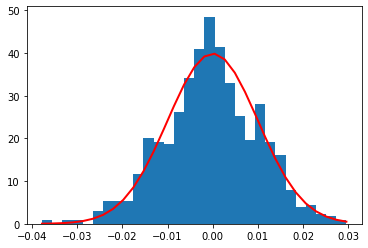

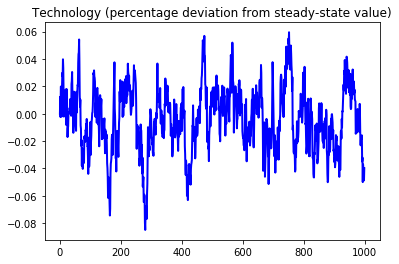

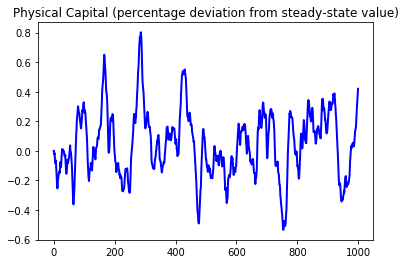

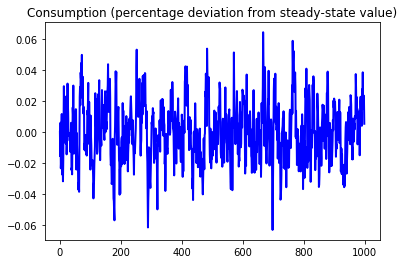

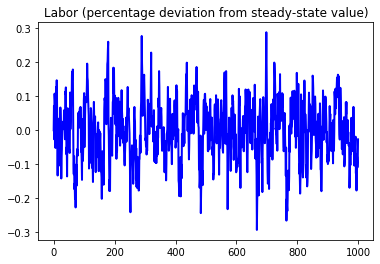

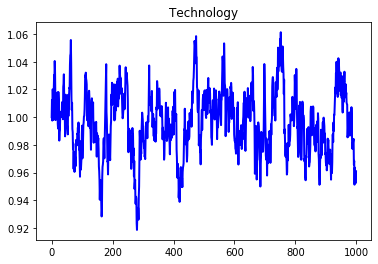

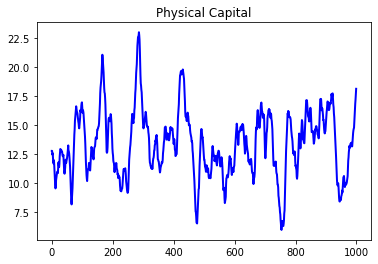

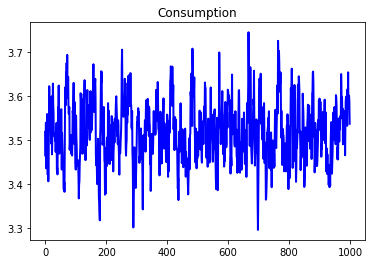

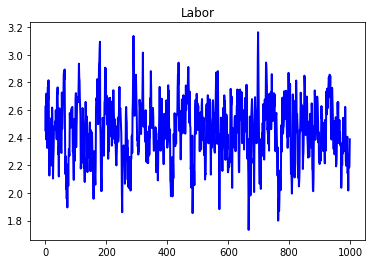

KeyboardInterrupt: 

In [2]:
#set parameters
aalpha = 0.39    
bbeta  = 0.95       
ggamma = 2
ddelta = 0.09
rrho = 0.9
ppsi = 1.25

#steady state
laborSS         = ((((1-aalpha)/ppsi)*((1/bbeta)-1+ddelta))**(1/ggamma))/(-ddelta*aalpha+((1/bbeta)-1+ddelta))        
capitalSS       = ((1/aalpha)*((1/bbeta)-1+ddelta)*laborSS**(aalpha-1))**(1/(aalpha-1))
outputSS        = capitalSS**aalpha*laborSS**(1-aalpha)  
consumptionSS   = ((1/aalpha)*((1/bbeta)-1+ddelta)-ddelta)*capitalSS

print ("Output = ", outputSS, " Capital = ", capitalSS, " Consumption = ", consumptionSS, "Labor =", laborSS) 

#log-linearize

##z
a11 = rrho
a12 = 0
a13 = 0 

##k
a21 = capitalSS**(aalpha-1)*laborSS**(1-aalpha) + ((consumptionSS**(ggamma))*laborSS*ppsi)/(aalpha*capitalSS)
a22 = (1/bbeta) + (((consumptionSS**(ggamma))*laborSS*ppsi)/(capitalSS))*capitalSS**(aalpha-1)
a23 = (ppsi*(consumptionSS**(ggamma))*laborSS)/(aalpha*capitalSS) + (consumptionSS/capitalSS)

##consumption
a31 = ((rrho-(1-ddelta)*bbeta*rrho))/(ggamma*(1-(1-aalpha)*(1-ddelta)*bbeta))
a32 = 0
a33 = (aalpha)/(1-(1-aalpha)*(1-ddelta)*bbeta)

##create matrix
mA = np.array([[a11, a12, a13],
                  [a21, a22, a23],
                  [a31, a32, a33]],float)
    
print ("Matrix Log-linearized system = ", mA) 

#########the above will all be the same no matter as paramters are set as scalara and equations will not change matrix#####
####loop run must occur starting her#####


for x in range(10000):
#diagonalize matrix

    eigenvalues, eigenvectors = np.linalg.eig(mA)


    idx = eigenvalues.argsort()
    print("index",idx)
    eigenvalues = eigenvalues[idx]
    V=eigenvectors[:,idx]
    D=np.diag(eigenvalues)
    print(D)
    print()
    print(V)

##select the submatrixes of D and V 
    D_1    = D[0:2,0:2]    
    V_11   = V[0:2,0:2]
    V_21   = V[2:, 0:2]

##coefficients in the solution of C
    VC =  V_21 @ inv(V_11)  ## Vector of coef in consumption function

    C_z = VC[0:1, 0:1]        ## Coef on z in consumption function
    C_k = VC[0:1, 1:]         ## Coef on k in consumption function

##coefficients in the solution of X 
    VX = V_11 @ D_1 @ inv(V_11)

    Z_z = VX[0:1,0:1]
    Z_k = VX[0:1,1:]

    K_z = VX[1:,0:1]
    K_k = VX[1:,1:]

##generate transformed tech levels (percentage deviation from ss value)
###gen shocks from N(0, sigma)
    mu, sigma = 0, 0.01
    et = np.random.normal(mu, sigma, 1000)

    count, bins, ignored = plt.hist(et, 30, normed=True)
    plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color = 'r')
    plt.show()

    index = range(1000)

    zt = np.zeros(len(index))

    zt0 = 0
    zt[0] = zt0   

    for n in index[1:]:
        zt[n] = Z_z * zt[n-1] + et[n]
    
    plt.plot(index, zt, linewidth = 2, color = 'b') 
    plt.title('Technology (percentage deviation from steady-state value)')
    plt.show()  

##gen trasnformed levels of physcial capital (% deviation from ss value)
    kt = np.zeros(len(index))  
 
    kt0 = 0
    kt[0] = kt0

    for n in index[1:]:
        kt[n] = K_z * zt[n-1] +  K_k * kt[n-1] 
    
    plt.plot(index, kt, linewidth = 2, color = 'b')
    plt.title('Physical Capital (percentage deviation from steady-state value)')
    plt.show()

#gen transformed levels of consumption (% deviation from ss value)
    ct = np.zeros(len(index)) 

    for n in index[0:]:
        ct[n] = C_z * zt[n] + C_k * kt[n]

    plt.plot(index, ct, linewidth = 2, color = 'b')
    plt.title('Consumption (percentage deviation from steady-state value)')
    plt.show()

#gen transformed levels of labor (% deviation from ss value)
    nt = (1/aalpha)*zt + (capitalSS**(aalpha-1))*kt - (1/aalpha)*ct  

    plt.plot(index, nt, linewidth = 2, color = 'b')
    plt.title('Labor (percentage deviation from steady-state value)')
    plt.show() 


##gen levels of tech
    z = np.exp(zt)

    plt.plot(index, z, linewidth = 2, color = 'b')
    plt.title('Technology')
    plt.show() 

##gen levels of capital
    k = (1 + kt)*capitalSS 

    plt.plot(index, k, linewidth = 2, color = 'b')
    plt.title('Physical Capital')
    plt.show() 

##gen levels of consumption
    c = (1 + ct)*consumptionSS 

    plt.plot(index, c, linewidth = 2, color = 'b')
    plt.title('Consumption')
    plt.show()

##gen levels of labor
    n =  (1 + nt)*laborSS 

    plt.plot(index, n, linewidth = 2, color = 'b')
    plt.title('Labor')
    plt.show()

##gen levels of output
    y = z*(k**aalpha)*(n**(1-aalpha))

    plt.plot(index, y, linewidth = 2, color = 'b')
    plt.title('Output')
    plt.show()


#gen cycle (Hoddrick-Prescott filter)

    

    cycle, trend = sm.tsa.filters.hpfilter(y, 1600)

    plt.plot(index, y, linewidth = 2, color = 'b', label='Output')
    plt.plot(index, trend, linewidth = 2, color = 'r', label='Trend')
    plt.title('Output and its Trend')
    plt.legend()

    plt.plot(index, cycle, linewidth = 2, color = 'b')
    plt.title('Business Cycle, Output')
    plt.show()